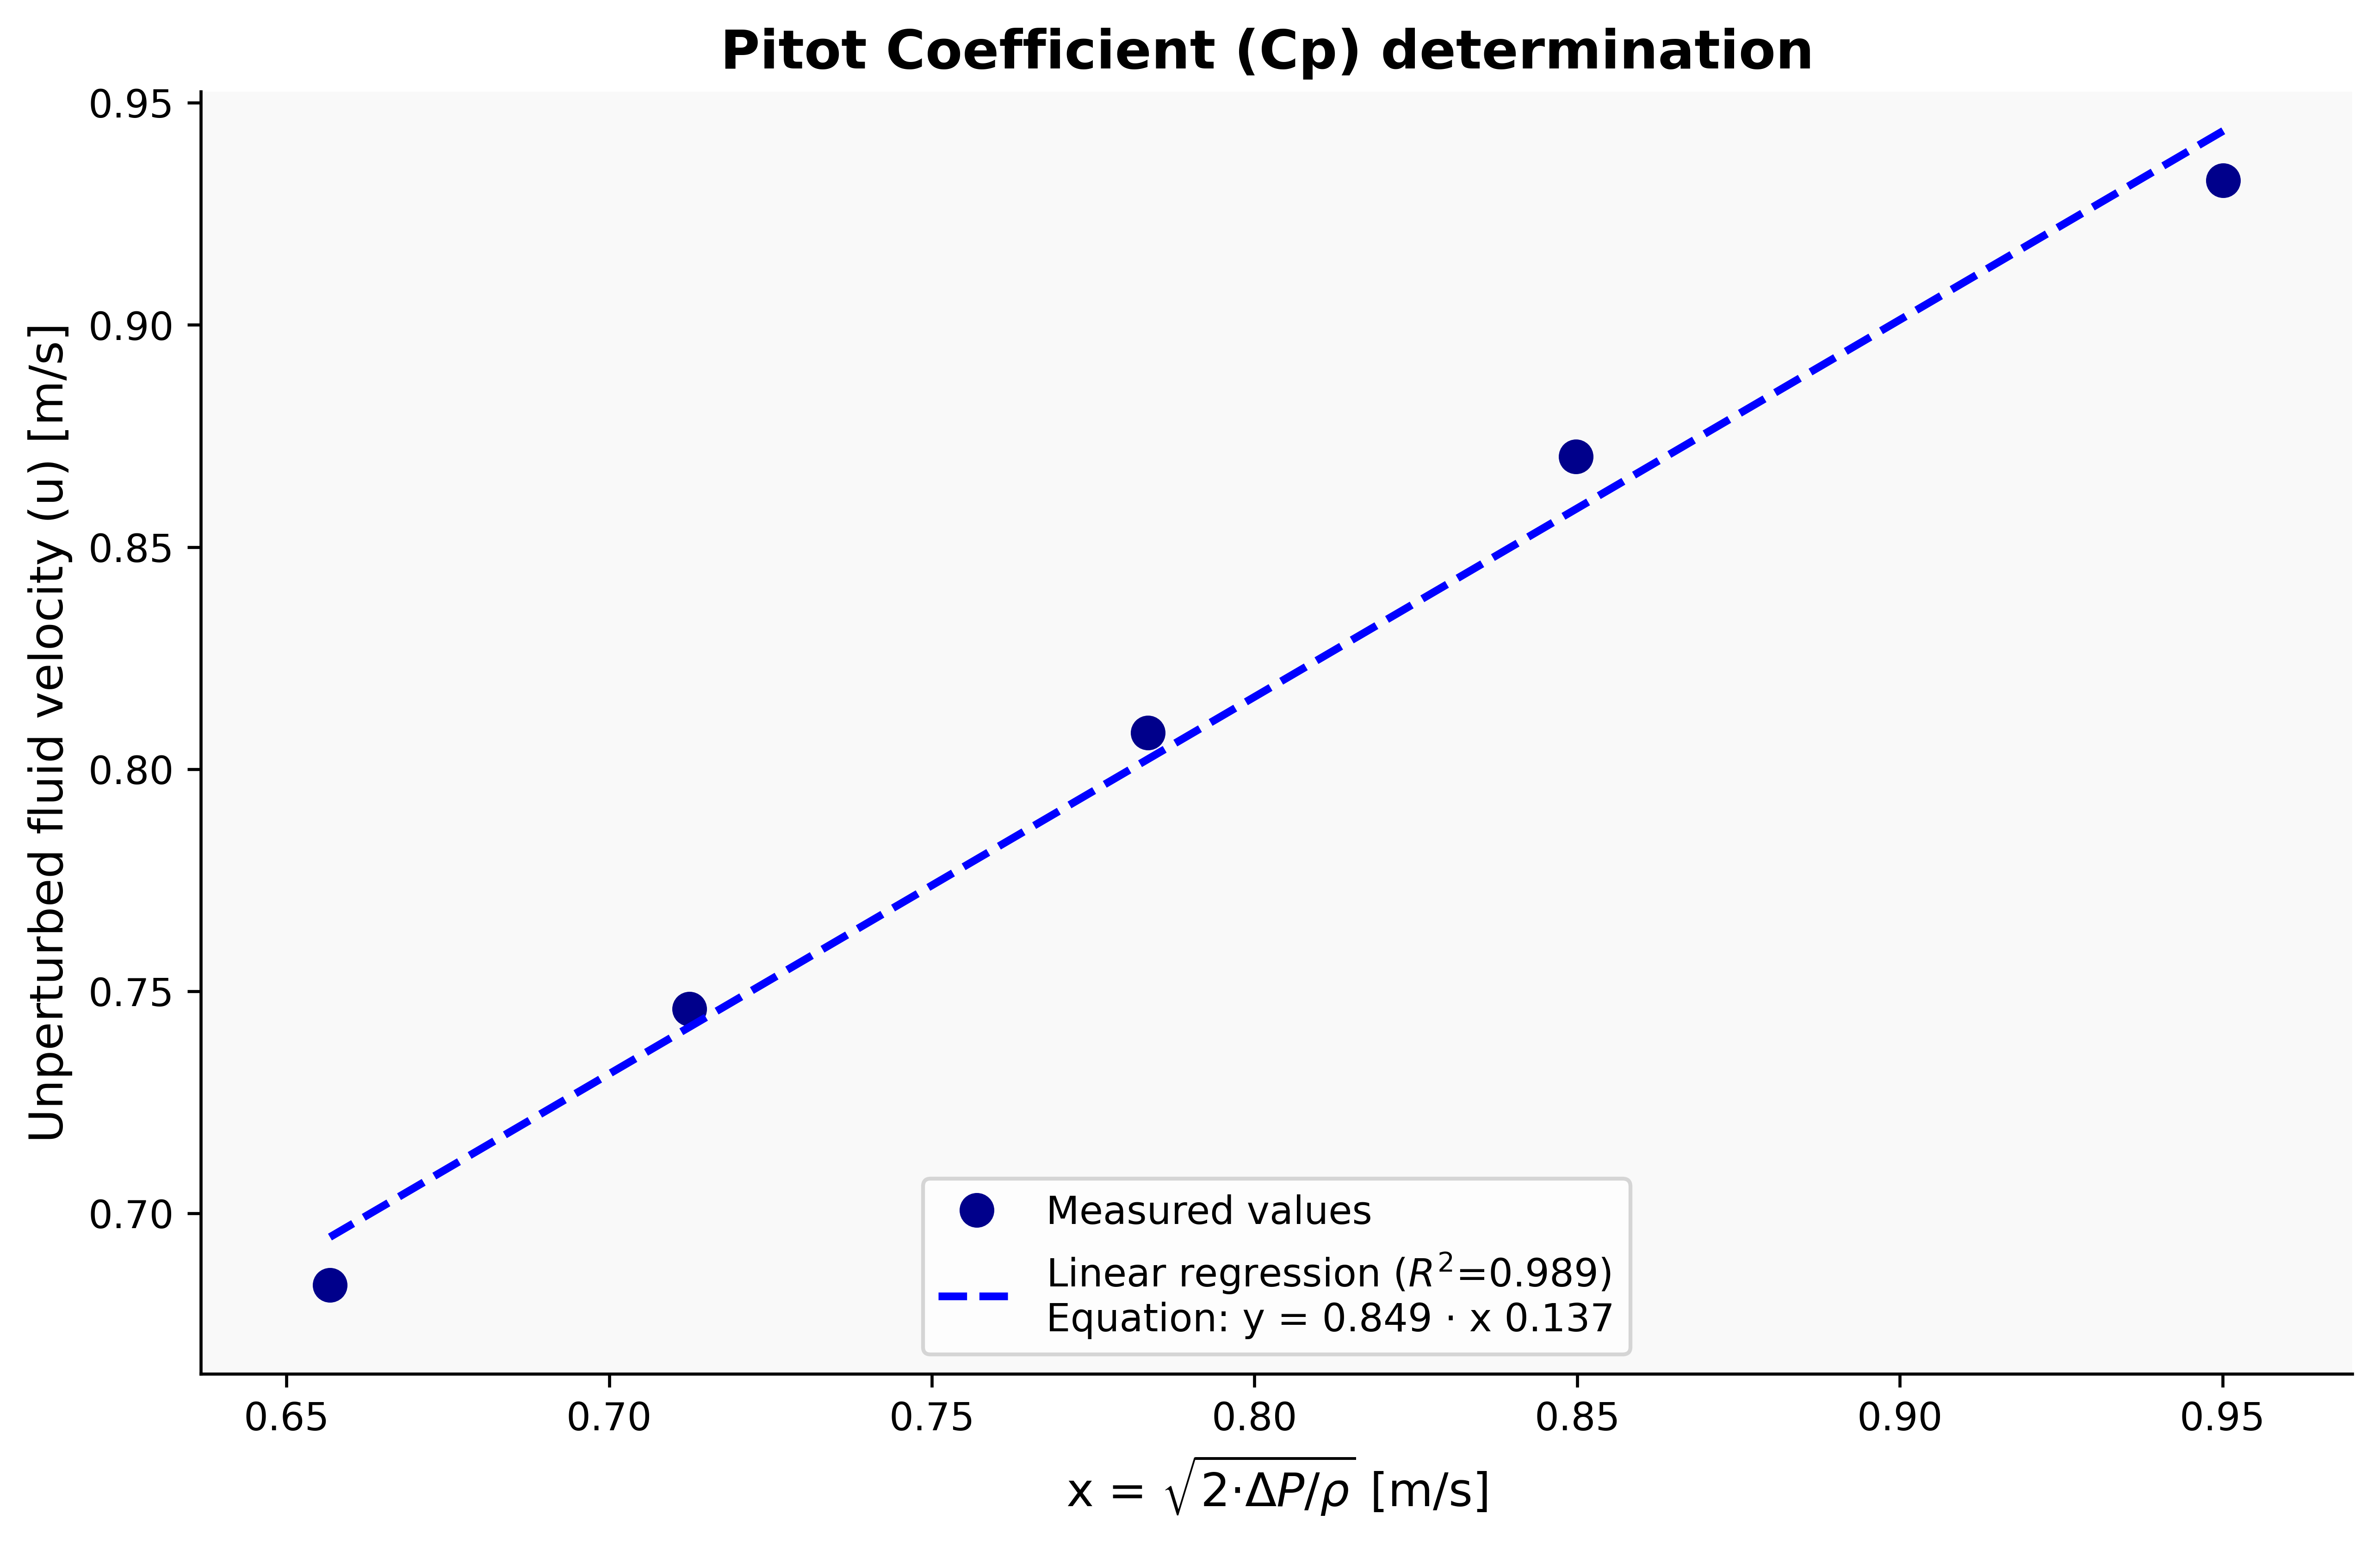

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


def read_excel_data(file_path):
    df = pd.read_excel(file_path, sheet_name="PITOT", skiprows=1) #skiprows: pas prendre la première rengée qui sert à rien
    return df

def plot_graph(data_frame):
    x = data_frame['Coeff [m/s]'][0:5] #données de l'excel, nom de la colonne entre guillemets
    y = data_frame['vcin [m/s]'][0:5]

    plt.figure(figsize=(10, 6), dpi = 600)  # Adjust figure size for better presentation, dpi: résolution de l'image

    # Plot data with specific style elements
    plt.plot(x, y, label='Measured values', color='darkblue', linestyle='', marker='o', markersize=8, linewidth=1.5)

    plt.xlabel('x = ${\sqrt{2⋅ΔP/ρ}}$ [m/s]', fontsize=12)
    plt.ylabel('Unperturbed fluid velocity (u) [m/s]', fontsize=12)
    plt.title('Pitot Coefficient (Cp) determination ', fontsize=14, weight='bold')

    # Adjust grid density
    plt.xticks(ticks=plt.xticks()[0][::1], fontsize=10, rotation ='horizontal')
    plt.yticks(ticks=plt.yticks()[0][::1], fontsize=10)

    plt.grid(False)

    # Add a subtle background color
    plt.gca().set_facecolor('#f9f9f9')

    # Remove spines for cleaner appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
     # Set x-axis and y-axis limits
    delta_x=0.02
    delta_y=0.02
    plt.xlim(min(x)-delta_x, max(x)+delta_x)
    plt.ylim(min(y)-delta_y, max(y)+delta_y)
    
    #Linear Regression
    fit_params = np.polyfit(x, y, 1)
    fit_line =[(fit_params[0]*x + fit_params[1]) for x in x]
    R = (np.corrcoef(x, y)[0,1])**2 #Determine R coefficient for the data
    equation = f'Equation: y = {fit_params[0]:.3f} ⋅ x {fit_params[1]:.3f}'
    
    
    # Plot linear regression
    plt.plot(x, fit_line, label=f'Linear regression ($R^{2}$={R:.3f}) \n{equation}', color='blue', linestyle='--', linewidth=2)
    
    #Show the legend
    plt.legend(loc='lower center')
    
def save_svg(file_path):
    plt.savefig(file_path + ".png", format='png')  # Save as a PNG file for matplotlib

def main():
    excel_file_path = r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-2_Q/TUBES.xlsx" 
    download_folder =r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-2_Q/"

    # Read data from Excel file
    data = read_excel_data(excel_file_path)

    # Plot the graph
    plot_graph(data)
    
    # Save the graph and download it
    svg_file_path = os.path.join(download_folder, 'graph_Pitot')
    save_svg(svg_file_path)
    
    plt.show()

if __name__ == "__main__":
    main()


In [4]:
print(2.0*3.0)


6.0
